In [1]:
#https://stats.nba.com/events/?flag=3&CFID=33&CFPARAMS=2017-18&PlayerID=204001&ContextMeasure=FGA&Season=2017-18&section=player&sct=hex
%matplotlib inline
import requests
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import json

In [2]:
# Get the webpage containing the data
import plot_team_compare

with open('regseason1819.txt') as json_file:  
    response = json.load(json_file)
with open('warriors1819P.txt') as json_file:
    response2 = json.load(json_file)


In [3]:
reg = pd.DataFrame(response['resultSets'][0]['rowSet'],columns=response['resultSets'][0]['headers'])

post = pd.DataFrame(response2['resultSets'][0]['rowSet'],columns=response2['resultSets'][0]['headers'])

missed_playoffs1819 = ['Charlotte Hornets', 'Miami Heat', 'Washington Wizards', 'Atlanta Hawks', 'Chicago Bulls', \
                       'Cleveland Cavaliers', 'New York Knicks', 'Sacramento Kings', 'Los Angeles Lakers', \
                       'Minnesota Timberwolves','Memphis Grizzlies', 'New Orleans Pelicans', 'Dallas Mavericks', 'Phoenix Suns']

for team_name in missed_playoffs1819:
    reg = reg[reg.TEAM_NAME != team_name]



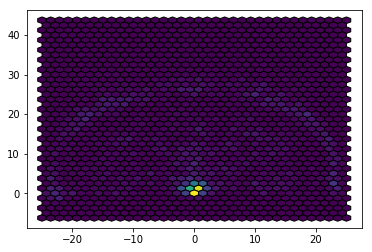

In [4]:
LA = reg.groupby(['SHOT_ZONE_RANGE','SHOT_ZONE_AREA','SHOT_MADE_FLAG']).size().unstack(fill_value=0)

LA['FGP'] = 1.0*LA.loc[:,1]/LA.sum(axis=1)

team = post.groupby(['SHOT_ZONE_RANGE','SHOT_ZONE_AREA','SHOT_MADE_FLAG']).size().unstack(fill_value=0)

team['FGP'] = 1.0*team.loc[:,1]/team.sum(axis=1)

team_vs_league = (team.loc[:,'FGP'] - LA.loc[:,'FGP'])*100

x,y = 1.0*post.LOC_X.values/10, 1.0*post.LOC_Y.values/10

fig = plt.figure()

poly_hexbins = plt.hexbin(x,y, gridsize=35, extent=[-25,25,-6.25,50-6.25], edgecolors='#000000')

counts = poly_hexbins.get_array()

#for count in counts:
#    print(count)

verts = poly_hexbins.get_offsets()
#for vert in verts:
 #   print(vert)

In [5]:
plot_team_compare.grantland_shotchart_orig(reg, post)

KeyError: 'FGM'

In [ ]:
shot_chart_url = 'https://stats.nba.com/stats/shotchartdetail?AheadBehind=&CFID=33&CFPARAMS='+\
'2014-15'+\
'&ClutchTime=&Conference=&ContextFilter=&ContextMeasure=FGA&DateFrom=&DateTo=&Division=&EndPeriod=10&EndRange=28800&GROUP_ID=&GameEventID=&GameID=&GameSegment=&GroupID=&GroupMode=&GroupQuantity=5&LastNGames=0&LeagueID=00&Location=&Month=0&OnOff=&OpponentTeamID=0&Outcome=&PORound=0&Period=0&PlayerID=0&PlayerID1=&PlayerID2=&PlayerID3=&PlayerID4=&PlayerID5=&PlayerPosition=&PointDiff=&Position=&RangeType=0&RookieYear=&Season='+\
'2014-15'+\
'&SeasonSegment=&SeasonType='+ \
'Regular+Season' + \
'&ShotClockRange=&StartPeriod=1&StartRange=0&StarterBench=&TeamID='+\
'0'+\
'&VsConference=&VsDivision=&VsPlayerID1=&VsPlayerID2=&VsPlayerID3=&VsPlayerID4=&VsPlayerID5=&VsTeamID='
print(shot_chart_url)

In [ ]:
'''Team IDs
Warriors = 1610612744
Rockets = 1610612745
Celtics = 1610612738
'''